In [8]:
%reset -f
import pandas as pd
import numpy as np
import os
from wavhandler import *
import logging
import matplotlib.pyplot as plt
from scipy import signal
import seaborn as sns; sns.set()

plt.rcParams['figure.figsize'] = [14, 6]

logger = logging.getLogger()
logger.setLevel(logging.WARN)

In [9]:
df = pd.read_csv('./data/mosquitos.csv', delimiter=';')

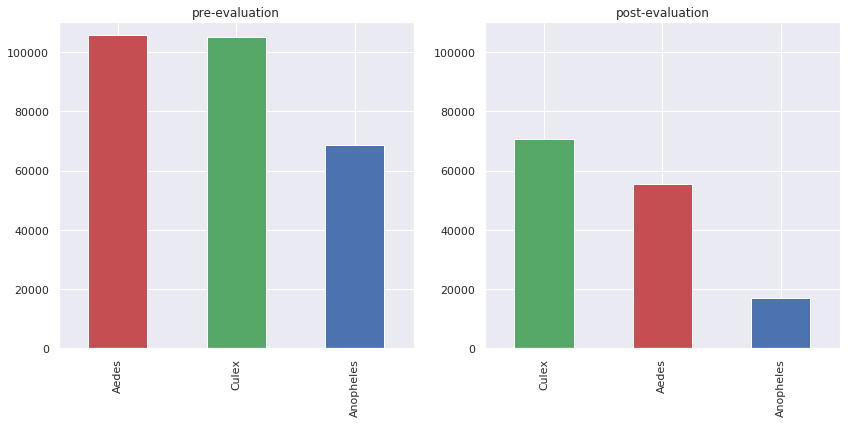

In [10]:
plt.subplot(1,2,1)
plt.title('pre-evaluation')
plt.ylim(0,110000)
df['class'].value_counts().plot(kind='bar', color=['r','g','b'])
plt.subplot(1,2,2)
plt.title('post-evaluation')
plt.ylim(0,110000)
df[df.evaluation == 1]['class'].value_counts().plot(kind='bar', color=['g','r','b']) ## HARDCODING COLORS

In [20]:
z = psd_welch_pows(df[df['class']=='Anopheles'].names.tolist())

In [21]:
sub = pd.DataFrame.from_dict(z, orient='index')

In [22]:
sub.shape

(68768, 129)

In [23]:
mapper = df.set_index('fname').evaluation.to_dict()
sub['evaluation'] = sub.index.map(mapper)

In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = sub.values[:,:-1]
y = sub.evaluation.values
X_std = StandardScaler().fit_transform(X);  # standardization of data

pca = PCA(n_components=2)
Χ_final = pca.fit_transform(X_std)


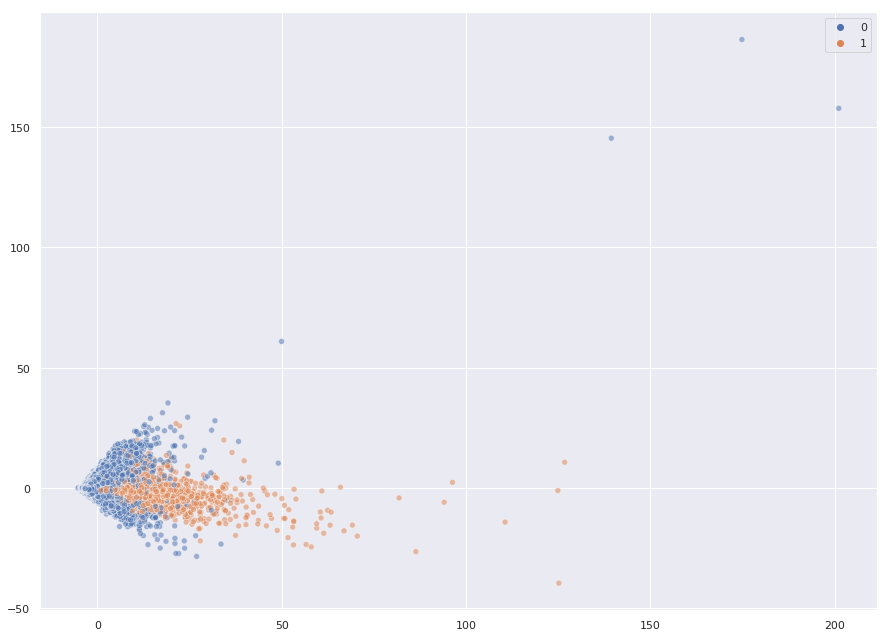

In [25]:
plt.figure(figsize=(15,11))
sns.scatterplot(Χ_final[:,0], Χ_final[:,1], hue=y, alpha=0.5)
#plt.xlabel('component 1')
#plt.ylabel('component 2')


In [29]:
df_pca = pd.DataFrame(pca.components_,columns=sub.iloc[:,:-1].columns,index = ['PC-1','PC-2'])
df_pca

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
PC-1,0.047695,0.064174,0.039341,0.022735,0.022524,0.030936,0.045386,0.051645,0.047980,0.015683,...,0.127226,0.132017,0.135628,0.137621,0.137079,0.136290,0.134901,0.129723,0.120866,0.099689
PC-2,0.046120,0.052281,0.044181,0.021822,0.013760,0.012744,0.014141,0.011512,0.008196,0.001578,...,-0.052872,-0.056768,-0.049424,-0.046109,-0.045440,-0.041294,-0.031642,-0.025145,-0.020682,-0.014812


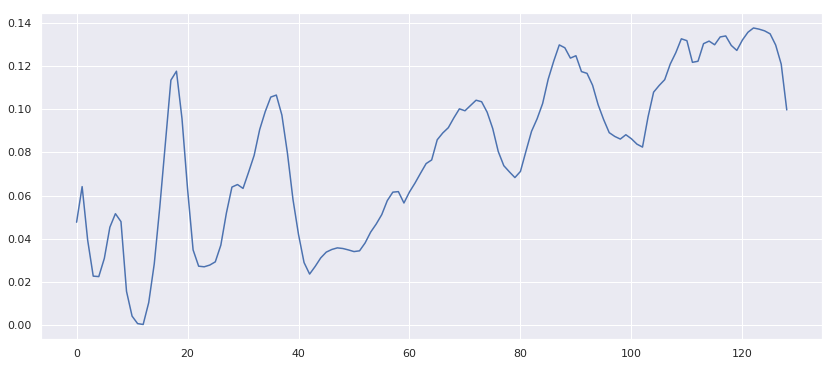

In [27]:
df_pca.loc['PC-1'].plot()

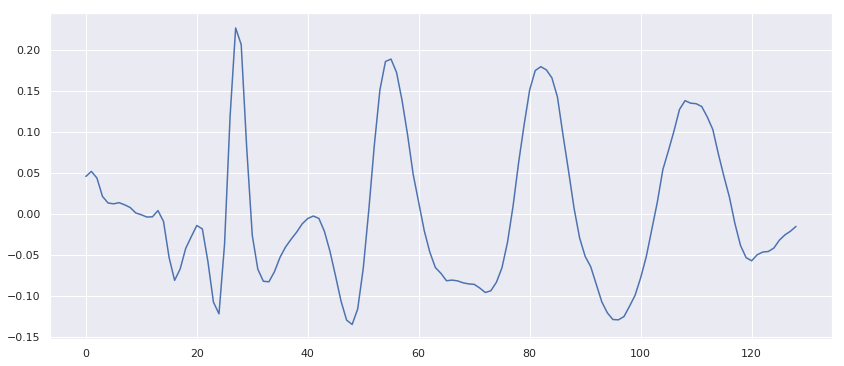

In [28]:
df_pca.loc['PC-2'].plot()